# Animated Python plot for genome cost

In [1]:
# Import the required packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [5]:
# Read in excel data
seq_data = pd.read_excel("seq-cost-2017.xlsx")
seq_data.head()

,Date,Cost per Mb,Production (Mb),Cost per Genome
0,2001-09-30,5292.392885,16200.361555,9.526307e+07
1,2002-03-31,3898.635412,16111.170305,7.017544e+07
2,2002-09-30,3413.801195,18733.953791,6.144842e+07
3,2003-03-31,2986.204671,23045.156321,5.375168e+07
4,2003-10-31,2230.975235,38343.979177,4.015755e+07


In [47]:
# plot the animation
%matplotlib notebook 
# Allow the animation to run in notebook
x =np.array(seq_data['Date'])
y = np.array(seq_data['Cost per Mb'])
mb_cost = pd.DataFrame(y,x) # create sub-dataframe
mb_cost.columns= {"Cost per Mb"}



In [48]:
# Create animation writer

Animator = animation.writers['ffmpeg'] 
writer= Animator(fps=20, metadata= dict(artist="Dylan Loader"),bitrate=1800)

RuntimeError: Requested MovieWriter (ffmpeg) not available

<IPython.core.display.Javascript object>


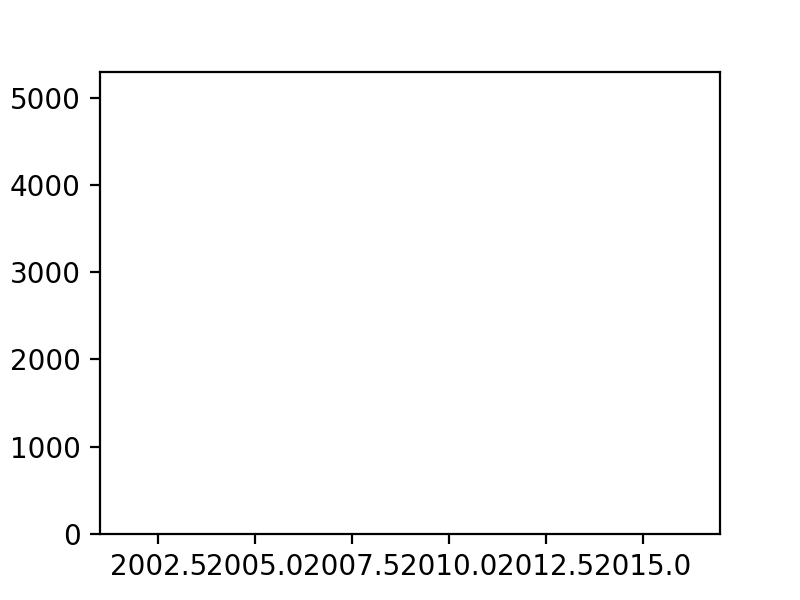

NameError: name 'fig' is not defined

In [46]:
ani = plt.figure(figsize=(4,3))
plt.xlim(2001,2017,1)
plt.ylim(np.min(seq_data)[1],np.max(seq_data)[1])

def animate(i):
    data = seq_data.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=seq_data.index, y=data["Cost per Mb"], data=data, color="r")
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)

ani.save('HeroinOverdosesJumpy.mp4', writer=writer)